In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
count_num = 1
set_num = 1

query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_name = []
lat = []
lng = []
date = []
country = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        
        print(f"Processing Record {count_num} of Set {set_num} | {city}")        
        
        count_num += 1
    except:
        print("City not found. Skipping...")
        pass
    
    if count_num == 51:
        set_num += 1
        count_num = 1
    
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')

Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | saint-malo
Processing Record 4 of Set 1 | pitea
Processing Record 5 of Set 1 | muros
Processing Record 6 of Set 1 | beringovskiy
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | san policarpo
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | bireun
Processing Record 16 of Set 1 | mountain home
City not found. Skipping...
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | saint george
City not found. Skipping...
Processing Record 19 of Set 1 | baiyin
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | talnakh
City not found. Skipping...
Processing R

Processing Record 36 of Set 4 | sinjar
Processing Record 37 of Set 4 | tuktoyaktuk
Processing Record 38 of Set 4 | itarema
Processing Record 39 of Set 4 | tilichiki
Processing Record 40 of Set 4 | bonoua
Processing Record 41 of Set 4 | horsham
Processing Record 42 of Set 4 | turbat
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | hailar
City not found. Skipping...
Processing Record 45 of Set 4 | jishou
Processing Record 46 of Set 4 | honningsvag
Processing Record 47 of Set 4 | goderich
Processing Record 48 of Set 4 | hatta
Processing Record 49 of Set 4 | mnogovershinnyy
Processing Record 50 of Set 4 | baruun-urt
Processing Record 1 of Set 5 | alamosa
Processing Record 2 of Set 5 | ironton
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | bilma
Processing Record 5 of Set 5 | ostersund
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | oga
Processing Record 9 of Set 5 | vardo
Process

Processing Record 26 of Set 8 | lander
Processing Record 27 of Set 8 | nova prata
Processing Record 28 of Set 8 | sioux lookout
Processing Record 29 of Set 8 | anjozorobe
Processing Record 30 of Set 8 | kununurra
Processing Record 31 of Set 8 | nova olimpia
Processing Record 32 of Set 8 | belmonte
Processing Record 33 of Set 8 | hope
Processing Record 34 of Set 8 | bushehr
Processing Record 35 of Set 8 | half moon bay
Processing Record 36 of Set 8 | asyut
Processing Record 37 of Set 8 | pokhvistnevo
Processing Record 38 of Set 8 | beloha
Processing Record 39 of Set 8 | jalalabad
Processing Record 40 of Set 8 | krasnoselkup
Processing Record 41 of Set 8 | preston
Processing Record 42 of Set 8 | hoshcha
Processing Record 43 of Set 8 | clyde river
Processing Record 44 of Set 8 | umm kaddadah
Processing Record 45 of Set 8 | sinnamary
City not found. Skipping...
Processing Record 46 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 47 of Set 8 | petropavl
Processing Record 48 of Set 8 

In [4]:
weather = pd.DataFrame({
    "City" : city_name,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date
})

weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,19.44,82,20,4.10,ZA,1604543581
1,Dikson,73.51,80.55,-16.69,91,0,2.48,RU,1604543554
2,Arrondissement de Saint-Malo,48.50,-1.83,6.00,87,0,3.10,FR,1604543663
3,Piteå,65.32,21.48,5.00,75,99,5.10,SE,1604543663
4,Muros,42.78,-9.06,11.67,66,90,2.24,ES,1604543634


In [5]:
weather.to_csv("weather_data.csv")

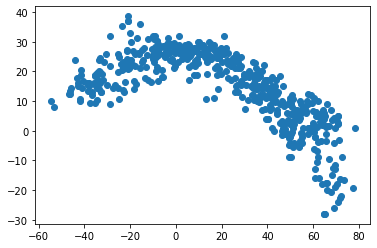

In [6]:
plt.scatter(weather["Lat"], weather["Max Temp"])

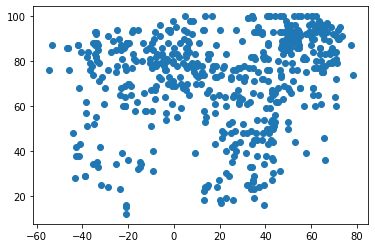

In [7]:
plt.scatter(weather["Lat"], weather["Humidity"])

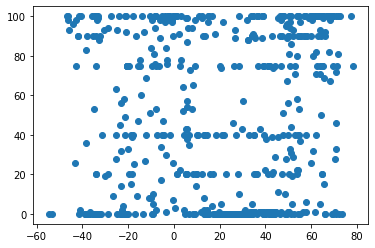

In [8]:
plt.scatter(weather["Lat"], weather["Cloudiness"])

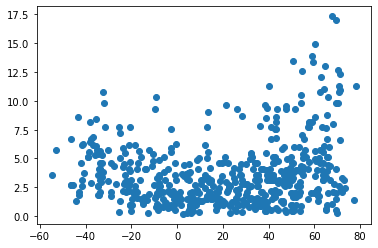

In [9]:
plt.scatter(weather["Lat"], weather["Wind Speed"])

In [35]:
northern_hem = weather.loc[weather["Lat"] > 0]
southern_hem = weather.loc[weather["Lat"] < 0]

The r value is -0.86


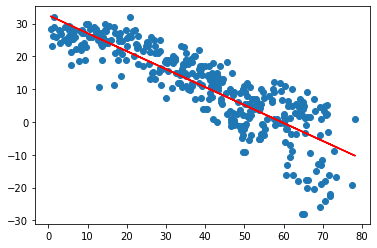

In [47]:
northern_temp = round(st.pearsonr(northern_hem['Lat'],northern_hem['Max Temp'])[0],2)

model = st.linregress(northern_hem['Lat'],northern_hem['Max Temp'])

y_values = northern_hem['Lat']*model[0]+model[1]
plt.scatter(northern_hem['Lat'],northern_hem['Max Temp'])
plt.plot(northern_hem['Lat'],y_values,color="red")
print(f"The r value is {northern_temp}")

The r value is 0.65


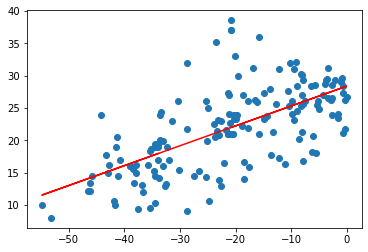

In [46]:
southern_temp = round(st.pearsonr(southern_hem['Lat'],southern_hem['Max Temp'])[0],2)

model1 = st.linregress(southern_hem['Lat'],southern_hem['Max Temp'])

y_values1 = southern_hem['Lat']*model1[0]+model1[1]
plt.scatter(southern_hem['Lat'],southern_hem['Max Temp'])
plt.plot(southern_hem['Lat'],y_values1,color="red")
print(f"The r value is {southern_temp}")

The r value is 0.25


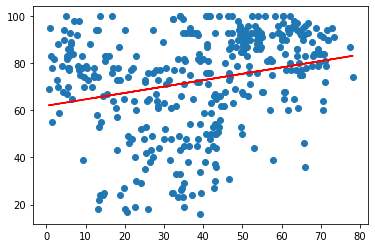

In [45]:
northern_hum = round(st.pearsonr(northern_hem['Lat'],northern_hem['Humidity'])[0],2)

model2 = st.linregress(northern_hem['Lat'],northern_hem['Humidity'])

y_values2 = northern_hem['Lat']*model2[0]+model2[1]
plt.scatter(northern_hem['Lat'],northern_hem['Humidity'])
plt.plot(northern_hem['Lat'],y_values2,color="red")
print(f"The r value is {northern_hum}")

The r value is 0.15


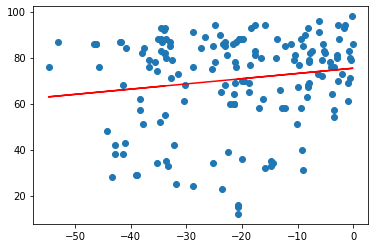

In [48]:
southern_hum = round(st.pearsonr(southern_hem['Lat'],southern_hem['Humidity'])[0],2)

model3 = st.linregress(southern_hem['Lat'],southern_hem['Humidity'])

y_values3 = southern_hem['Lat']*model3[0]+model3[1]
plt.scatter(southern_hem['Lat'],southern_hem['Humidity'])
plt.plot(southern_hem['Lat'],y_values3,color="red")
print(f"The r value is {southern_hum}")

The r value is 0.28


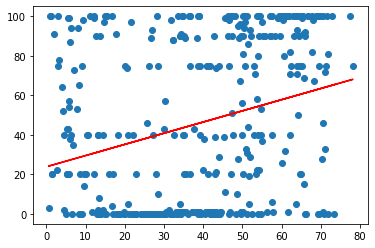

In [49]:
northern_cloud = round(st.pearsonr(northern_hem['Lat'],northern_hem['Cloudiness'])[0],2)

model4 = st.linregress(northern_hem['Lat'],northern_hem['Cloudiness'])

y_values4 = northern_hem['Lat']*model4[0]+model4[1]
plt.scatter(northern_hem['Lat'],northern_hem['Cloudiness'])
plt.plot(northern_hem['Lat'],y_values4,color="red")
print(f"The r value is {northern_cloud}")

The r value is 0.13


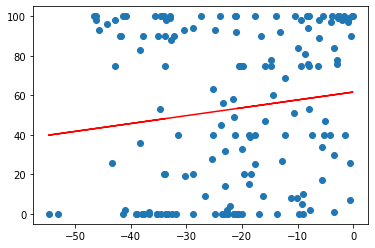

In [50]:
southern_cloud = round(st.pearsonr(southern_hem['Lat'],southern_hem['Cloudiness'])[0],2)

model5 = st.linregress(southern_hem['Lat'],southern_hem['Cloudiness'])

y_values5 = southern_hem['Lat']*model5[0]+model5[1]
plt.scatter(southern_hem['Lat'],southern_hem['Cloudiness'])
plt.plot(southern_hem['Lat'],y_values5,color="red")
print(f"The r value is {southern_cloud}")

The r value is 0.37


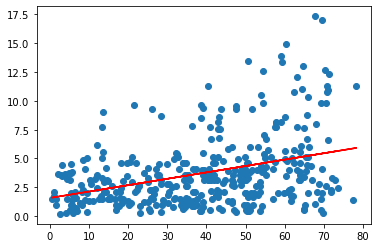

In [51]:
northern_wind = round(st.pearsonr(northern_hem['Lat'],northern_hem['Wind Speed'])[0],2)

model6 = st.linregress(northern_hem['Lat'],northern_hem['Wind Speed'])

y_values6 = northern_hem['Lat']*model6[0]+model6[1]
plt.scatter(northern_hem['Lat'],northern_hem['Wind Speed'])
plt.plot(northern_hem['Lat'],y_values6,color="red")
print(f"The r value is {northern_wind}")

The r value is -0.32


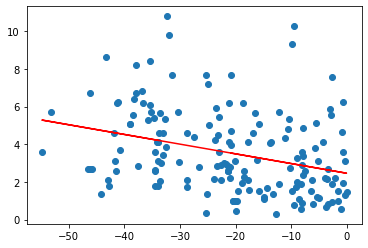

In [52]:
southern_wind = round(st.pearsonr(southern_hem['Lat'],southern_hem['Wind Speed'])[0],2)

model7 = st.linregress(southern_hem['Lat'],southern_hem['Wind Speed'])

y_values7 = southern_hem['Lat']*model7[0]+model7[1]
plt.scatter(southern_hem['Lat'],southern_hem['Wind Speed'])
plt.plot(southern_hem['Lat'],y_values7,color="red")
print(f"The r value is {southern_wind}")